In [24]:
# Import necessary libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)
print('Seaborn version', sns.__version__)

Pandas version 0.23.0
Numpy version 1.14.3
Seaborn version 0.9.0


In [25]:
# Read datasets from CSVs
df = pd.read_csv('datasets/ml-latest-small/ratings.csv')
movieTitles = pd.read_csv('datasets/ml-latest-small/movies.csv')

In [26]:
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [28]:
movieTitles.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [29]:
movieTitles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [30]:
df = pd.merge(df, movieTitles, on='movieId')
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


We will create a new dataframe which will have rating for title and number of ratings it received.b

In [57]:
averageRatingsDf = pd.DataFrame(df.groupby('title')['rating'].mean())
averageRatingsDf['numberOfRatings'] = df.groupby('title')['rating'].count()
averageRatingsDf.head(10)

,rating,numberOfRatings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [58]:
averageRatingsDf = averageRatingsDf.sort_values(['numberOfRatings', 'rating'], ascending=False)
averageRatingsDf.head(15)

,rating,numberOfRatings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


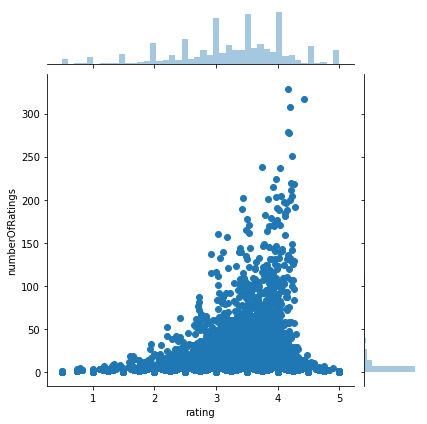

In [59]:
sns.jointplot(x='rating', y='numberOfRatings', data=averageRatingsDf)

The above scatter plot clarly shows, that avergae rating of movies goes up with more number of ratings.

In [60]:
# Data engineering
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we will choose two movies, for which we will recommend movies.
I've choosen

- Forrest Gump
- Braveheart

In [61]:
forest_gump_user_rating = movie_matrix['Forrest Gump (1994)']
braveheart_user_rating = movie_matrix['Braveheart (1995)']

In [62]:
forest_gump_user_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [63]:
braveheart_user_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Braveheart (1995), dtype: float64

In [64]:
# Find correlation between watched movies and all movies
similar_to_forest_gump = movie_matrix.corrwith(forest_gump_user_rating)
similar_to_braveheart = movie_matrix.corrwith(braveheart_user_rating)

In [65]:
similar_to_forest_gump.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [66]:
similar_to_braveheart.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [67]:
corr_forest_gump = pd.DataFrame(similar_to_forest_gump, columns=['Correlation'])
corr_forest_gump.dropna(inplace=True)
corr_forest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [68]:
corr_braveheart = pd.DataFrame(similar_to_braveheart, columns=['correlation'])
corr_braveheart.dropna(inplace=True)
corr_braveheart.head()

,correlation
title,
"'burbs, The (1989)",0.332504
(500) Days of Summer (2009),0.021388
*batteries not included (1987),-1.000000
...And Justice for All (1979),0.327327
10 Cloverfield Lane (2016),0.534522


In [69]:
corr_forest_gump = corr_forest_gump.join(averageRatingsDf['numberOfRatings'])
corr_braveheart = corr_braveheart.join(averageRatingsDf['numberOfRatings'])

In [72]:
corr_braveheart[corr_braveheart['numberOfRatings'] > 50 ].sort_values(by='correlation', ascending=False).head(10)

,correlation,numberOfRatings
title,,
Braveheart (1995),1.000000,237
Field of Dreams (1989),0.682274,56
Mystic River (2003),0.644782,52
Grumpier Old Men (1995),0.636963,52
Kung Fu Panda (2008),0.625232,54
Batman Begins (2005),0.610550,116
Guardians of the Galaxy (2014),0.604996,59
Top Gun (1986),0.600929,83
Rocky (1976),0.599043,64


In [74]:
corr_forest_gump[corr_forest_gump['numberOfRatings'] > 50 ].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,numberOfRatings
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53
